# EE379K: Lab 2
## Group Members: Irfan Hasan (ih3976), Peter Zhang (yz7724)

## Question 1

-------------1a--------------
-----Correlation coefficients from pandas-----

          0         1         2         3
0  1.000000 -0.003998  0.990066  0.004111
1 -0.003998  1.000000 -0.004085 -0.990235
2  0.990066 -0.004085  1.000000  0.004067
3  0.004111 -0.990235  0.004067  1.000000

------ Heatmap from Seaborn -------



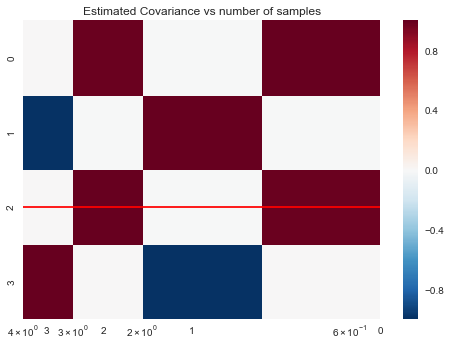


From the data it can be seen that the following columns are correlated: 
(0,2), (1,3)

--------- 1b ----------
Covariance matrix is the pairwise covariance between all the columns in the dataset

          0         1         2         3
0  1.001558 -0.004012  0.991624  0.004125
1 -0.004012  1.005378 -0.004099 -0.995457
2  0.991624 -0.004099  1.001589  0.004081
3  0.004125 -0.995457  0.004081  1.005168
The covariance matrix reflects the results seen in the plots. Specifically we can see that columns 0 and 2 and 1 and 3 have the highest covariance.


--------- 1c ----------
Choosen covariance:
[[ 3.   0.   0. ]
 [ 0.   1.5  0.5]
 [ 0.   0.5  6. ]]



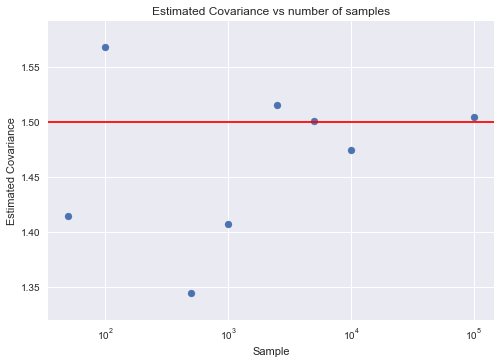

In [34]:
import pandas as pd
import seaborn as sns
import numpy as np
from pandas.plotting import scatter_matrix
import matplotlib.pyplot as plt

df = pd.read_csv('Lab2_Data/DF1')
df = df.drop(df.columns[[0]], axis=1) 
corr = df.corr()
print("-------------1a--------------")
print("-----Correlation coefficients from pandas-----\n")
print(corr)

print("\n------ Heatmap from Seaborn -------\n")
sns.heatmap(corr)
plt.show()

print("\nFrom the data it can be seen that the following columns are correlated: ")
print("(0,2), (1,3)\n")

print("--------- 1b ----------")
print("Covariance matrix is the pairwise covariance between all the columns in the dataset\n")
print(df.cov())
print("The covariance matrix reflects the results seen in the plots. Specifically we can see that columns 0 and 2 and 1 and 3 have the highest covariance.\n")

print("\n--------- 1c ----------")
cov = [[3, 0, 0], [0, 1.5, 0.5], [0, 0.5, 6]]
print('Choosen covariance:\n{}\n'.format(np.matrix(cov)))
samples = [50, 100, 500, 1000, 2500, 5000, 10000, 100000]
res = []

for n in samples:
    sample = np.random.multivariate_normal([0,0,0], cov, n)
    estimated_cov = np.cov(sample, rowvar=False)
    res.append(estimated_cov[1][1])

fig = plt.figure()
ax = plt.gca()
ax.scatter(samples, res)
ax.set_xscale('log')
ax.set_title('Estimated Covariance vs number of samples')
plt.axhline(y=1.5, c='r')
plt.xlabel('Sample')
plt.ylabel('Estimated Covariance')
plt.show()

## Question 2

------ Original plot ------



/Users/irfanhasan/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:7: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate_ix
  import sys


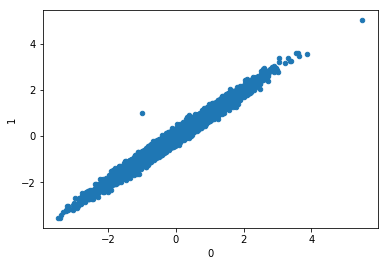


We used the MinMaxScaler as it would shrink the x and y axises to a range from 0 to 1.
We believe shrinking the x-axis especially will reveal the outlier which is more prominent on the y-axis.

----- Transformed plot ------



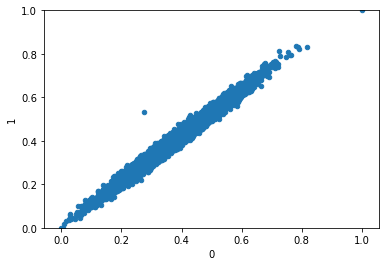

In [22]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
%matplotlib inline

print('------ Original plot ------\n')
df2 = pd.read_csv('Lab2_Data/DF2')
df2 = df2.ix[:, 1:]
df2.plot.scatter(x='0', y='1')
plt.show()

scaler = MinMaxScaler()
df2_scale = scaler.fit_transform(df2)
df2_scaled = pd.DataFrame(data=df2_scale)

print('\nWe used the MinMaxScaler as it would shrink the x and y axises to a range from 0 to 1.')
print('We believe shrinking the x-axis especially will reveal the outlier which is more prominent on the y-axis.')
print('\n----- Transformed plot ------\n')
g = df2_scaled.plot.scatter(x=0, y=1)
g.set_ylim([0, 1])
plt.show()

## Question 3

In [1]:
import numpy as np

def calc_std_dev(n):
    deltas = []
    for i in range(n):
        X = np.random.randn(n)
        E = np.random.randn(n)
        y = -3 + np.dot(X, 0) + E
        beta_h = np.dot(X,y) / np.dot(X,X)
        deltas.append(beta_h)
    return np.std(deltas)

calc_std_dev(150)

0.24904452509546193

We can see that B_hat = -0.15 is not as significant since the empirical standard deviation of the error is much larger than 0.15, so the error accounts for all of it.

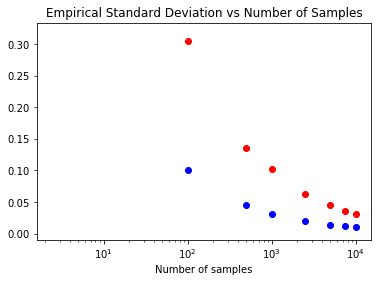

The fit is good.


In [5]:
import math
import numpy as np
import matplotlib.pyplot as plt

def calc_std_dev(n):
    deltas = []
    for i in range(n):
        X = np.random.randn(n)
        E = np.random.randn(n)
        y = -3 + np.dot(X, 0) + E
        beta_h = np.dot(X,y) / np.dot(X,X)
        deltas.append(beta_h)
    return np.std(deltas)

samples =  [100, 500, 1000, 2500, 5000, 7500, 10000]
std_devs = []
one_over = []
for n in samples:
    std_dev = calc_std_dev(n)
    std_devs.append(std_dev)
    one_over.append(1/math.sqrt(n))

fig = plt.figure()
ax = plt.gca()
ax.scatter(samples, std_devs, c='r')
ax.scatter(samples, one_over, c='b')
ax.set_xscale('log')
ax.set_title('Empirical Standard Deviation vs Number of Samples')
plt.xlabel('Number of samples')
plt.show()
print('The fit is good.')

## Question 4

Write a program taht on input k and XXXX, returns the top k names from year XXXX

In [9]:
%%file q4a.py
import sys
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

def main():
    if len(sys.argv) != 3:
        print "invalid arguments"
        exit(1)

    k = int(sys.argv[1])
    year = sys.argv[2]

    filename = "Names/yob" + year + ".txt"
    data = pd.read_csv(filename, sep=",", header=None)
    print data.head(k)

if __name__ == "__main__":
    main()

Overwriting q4a.py


In [10]:
%%!
python q4a.py 5 1996

['          0  1      2',
 '0     Emily  F  25150',
 '1   Jessica  F  24192',
 '2    Ashley  F  23676',
 '3     Sarah  F  21029',
 '4  Samantha  F  20545']

Write a program that on input Name returns the frequency for men and women of the name Name

In [31]:
%%file q4b.py
import sys
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

def main():
    if len(sys.argv) != 2:
        print "invalid arguments"
        exit(1)

    name = sys.argv[1]
    for year in range(1880, 2016):
        filename = "Names/yob" + str(year) + ".txt"
        data = pd.read_csv(filename, sep=",", header=None)
        data = data[data[0] == name]
        for row in data.itertuples():
            print '{0} {1} {2} {3}'.format(str(year), row[1], row[2], str(row[3]))

if __name__ == "__main__":
    main()

Overwriting q4b.py


In [32]:
%%!
python q4b.py Ida

['1880 Ida F 1472',
 '1880 Ida M 8',
 '1881 Ida F 1439',
 '1881 Ida M 5',
 '1882 Ida F 1673',
 '1882 Ida M 5',
 '1883 Ida F 1634',
 '1883 Ida M 5',
 '1884 Ida F 1882',
 '1884 Ida M 8',
 '1885 Ida F 1854',
 '1885 Ida M 6',
 '1886 Ida F 2049',
 '1886 Ida M 8',
 '1887 Ida F 1929',
 '1887 Ida M 9',
 '1888 Ida F 2229',
 '1888 Ida M 13',
 '1889 Ida F 2122',
 '1889 Ida M 8',
 '1890 Ida F 2178',
 '1890 Ida M 10',
 '1891 Ida F 2002',
 '1892 Ida F 2259',
 '1892 Ida M 10',
 '1893 Ida F 2247',
 '1893 Ida M 9',
 '1894 Ida F 2195',
 '1894 Ida M 9',
 '1895 Ida F 2170',
 '1895 Ida M 10',
 '1896 Ida F 2159',
 '1896 Ida M 5',
 '1897 Ida F 2108',
 '1897 Ida M 6',
 '1898 Ida F 2090',
 '1898 Ida M 8',
 '1899 Ida F 1804',
 '1899 Ida M 10',
 '1900 Ida F 2285',
 '1900 Ida M 13',
 '1901 Ida F 1835',
 '1901 Ida M 6',
 '1902 Ida F 1836',
 '1903 Ida F 1774',
 '1903 Ida M 6',
 '1904 Ida F 1751',
 '1904 Ida M 6',
 '1905 Ida F 1757',
 '1905 Ida M 11',
 '1906 Ida F 1753',
 '1906 Ida M 6',
 '1907 Ida F 1980',
 '1907 I

Modify the above program to return relative frequency.

In [1]:
%%file q4c.py
import sys
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

def main():
    if len(sys.argv) != 2:
        print "invalid arguments"
        exit(1)

    name = sys.argv[1]
    for year in range(1880, 2016):
        filename = "Names/yob" + str(year) + ".txt"
        data = pd.read_csv(filename, sep=",", header=None)
        total = data[2].sum()
        data = data[data[0] == name]
        for row in data.itertuples():
            print "{0} {1} {2} {3:8} {4:.9f}".format(str(year), row[1], row[2], row[3], float(row[3])/total)

if __name__ == "__main__":
    main()

Overwriting q4c.py


In [2]:
%%!
python q4c.py Mike

['1880 Mike M       95 0.000471506',
 '1881 Mike M       44 0.000228339',
 '1882 Mike M       89 0.000401744',
 '1883 Mike M       73 0.000336491',
 '1884 Mike M       84 0.000345022',
 '1885 Mike M       84 0.000348759',
 '1886 Mike M       84 0.000329000',
 '1887 Mike M       73 0.000295073',
 '1888 Mike M       81 0.000270474',
 '1889 Mike M       72 0.000249180',
 '1890 Mike M       83 0.000275381',
 '1891 Mike M       64 0.000223249',
 '1892 Mike M       76 0.000227288',
 '1893 Mike M       67 0.000206013',
 '1894 Mike M       87 0.000256871',
 '1895 Mike M       85 0.000242149',
 '1896 Mike M       85 0.000237772',
 '1897 Mike M       92 0.000265162',
 '1898 Mike M      106 0.000277879',
 '1899 Mike M       83 0.000244668',
 '1900 Mike M      132 0.000293130',
 '1901 Mike M       98 0.000283388',
 '1902 Mike M       99 0.000255990',
 '1903 Mike M      113 0.000296428',
 '1904 Mike M      118 0.000292444',
 '1905 Mike M      117 0.000275982',
 '1906 Mike M      141 0.000329085',
 

Find all names that used to be more popular for one gender, but then became more popular for another gender.

In [47]:
import sys
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

'''
For a name to have a change in popularity, its starting populrtity
is compared to its popularity in most recent year
'''

def main():
    result = set()
    names = {} # {name : [m_init, f_init, m_end, f_end]}
    
    for year in range(1880, 2016):
        filename = "Names/yob" + str(year) + ".txt"
        data = pd.read_csv(filename, sep=",", header=None)
        
        for row in data.itertuples():
            if row[1] in names:
                if row[2] == 'M':
                    names[row[1]][2] = row[3]
                else:
                    names[row[1]][3] = row[3]
            else:
                if row[2] == 'M':
                    names[row[1]] = [row[1], 0, 0, 0]
                else:
                    names[row[1]] = [0, row[1], 0, 0]

    for k, v in names.iteritems():
        if (v[0] > v[1] and v[2] < v[3]) or (v[0] < v[1] and v[2] > v[3]):
            result.add(k)

    for n in result:
        print n
                
if __name__ == "__main__":
    main()

Lean
Leal
Cimarron
Malachia
Datril
Rylin
Bailey
Iyari
Danieal
Rayli
Vinci
Peniel
Jemiah
Merle
Gwynn
Kyley
Kinta
Montrose
Deshon
Henry
Jayde
Toma
Myan
Tomie
Lear
Dail
Khori
Challis
Amanpreet
Daryen
Sandi
Khamryn
Lesa
Talley
Leelynn
Kinsey
Sandy
Challie
Freddi
Eddi
Claude
Christia
Claudy
Boots
Collins
Charly
Ryle
Avery
Brees
Jazzman
Terin
Hailey
Hillis
Kayton
Miccah
Marche
Jamaine
Vilas
Sitha
Deshonte
Jamine
Tippy
Shaquelle
Merrill
Zi
Bennie
Khanh
Darein
Aundra
Sher
Earsel
Tashawn
Deshan
Vashon
Jer
Shean
Shaune
Jet
Joshlin
Ople
Dester
Valon
Jen
Jem
Weslie
Rennie
Star
Oluwasemilore
Jung
Leshan
Gentry
Maywood
Finnly
Emeka
Devry
Aareon
Jadie
Yarden
Jovonnie
Jadis
Emerson
Rami
Brandell
Kenyota
Waverley
Tela
Carrey
Auther
Breslin
Alexiel
Beebe
Camyron
Delmis
Roshan
Briar
Elham
Jerre
Earnie
Lu
Arguster
Bunny
Xyon
Jacy
Jonte
Dominquie
Dell
Naylen
Nasim
Kay
Heathe
Joset
Carlon
Otha
Tatem
Ocean
Everal
Connolly
Meade
Reese
Merrit
Juanito
Divine
Taris
Roshon
Kweli
Ale
Quinn
Aly
Keontay
Matti
Brazil

Reve
Janvier
Tamer
Danon
Lannis
Irah
Shann
Nylen
Vollie
Shenandoah
Treva
Aryan
Hilal
Tarry
Ka
Dominque
Shadyn
Success
Meredith
Hillory
Ki
Kaisyn
Zavia
Munachi
Rannie
Cleary
Ku
Jaycee
Phuong
Codie
Abir
Diandre
Jandy
Najai
Ellison
Byntlee
Auburn
Reda
Mabrey
Caley
Karsin
Zamari
Tayde
Ragan
Abie
Kiare
Pat
Yasha
Lakai
Tristyn
Donn
Kyre
Terez
Kamdyn
Pam
Nikel
Mykeal
Deavin
Rollins
Berkley
Billie
Stevie
Shaquez
Lyndall
Makell
Nashawn
Sheridan
Robbie
Rommy
Arzell
Rhemy
Temari
Dorien
Tateum
Nassim
Ashtin
Dorey
Loney
Soma
Newborn
Beni
Murrel
Jaquise
Sheril
Kalai
Gwynne
Lochlyn
Harry
Cordell
Daley
Terral
Regan
Tavares
Roen
Tamaris
Doney
Tashan
Ewell
Moo
Jordain
Rashawn
Donel
Adrienn
Cayce
Psalms
Ive
Yari
Schell
Jessy
Tallyn
Rahja
Devinn
Sinclair
Rihan
Maury
Devine
Clydie
Dashawn
Breckin
Chandar
Emry
Joell
Devone
Lyan
Meba
Raini
Emra
Alexius
Lindel
Callin
Renie
Jule
Ocie
Natori
Aliyan
Berthal
Ammie
Linder
Leshon
Richie
Waverly
Cinsere
Aalijah
Kashmir
Merlyn
Charlemagne
Hawley
Zan
Alexsis
Zai
Cazia

## Question 5

Tutorial by Dataquest

In [4]:
import pandas as pd

tweets = pd.read_csv("tweets.csv")
tweets.head()

,id,id_str,user_location,user_bg_color,retweet_count,user_name,polarity,created,geo,user_description,user_created,user_followers,coordinates,subjectivity,text
0,1,729828033092149248,Wheeling WV,022330,0,Jaybo26003,0.00,2016-05-10T00:18:57,NaN,NaN,2011-11-17T02:45:42,39,NaN,0.0,Make a difference vote! WV Bernie Sanders Coul...
1,2,729828033092161537,NaN,C0DEED,0,brittttany_ns,0.15,2016-05-10T00:18:57,NaN,18 // PSJAN,2012-12-24T17:33:12,1175,NaN,0.1,RT @HlPHOPNEWS: T.I. says if Donald Trump wins...
2,3,729828033566224384,NaN,C0DEED,0,JeffriesLori,0.00,2016-05-10T00:18:57,NaN,NaN,2012-10-11T14:29:59,42,NaN,0.0,You have no one to blame but yourselves if Tru...
3,4,729828033893302272,global,C0DEED,0,WhorunsGOVs,0.00,2016-05-10T00:18:57,NaN,Get Latest Global Political news as they unfold,2014-02-16T07:34:24,290,NaN,0.0,'Ruin the rest of their lives': Donald Trump c...
4,5,729828034178482177,"California, USA",131516,0,BJCG0830,0.00,2016-05-10T00:18:57,NaN,Queer Latino invoking his 1st amendment privil...,2009-03-21T01:43:26,354,NaN,0.0,"RT @elianayjohnson: Per source, GOP megadonor ..."


In [5]:
def get_candidate(row):
    candidates = []
    text = row["text"].lower()
    if "clinton" in text or "hillary" in text:
        candidates.append("clinton")
    if "trump" in text or "donald" in text:
        candidates.append("trump")
    if "sanders" in text or "bernie" in text:
        candidates.append("sanders")
    return ",".join(candidates)

tweets["candidate"] = tweets.apply(get_candidate,axis=1)

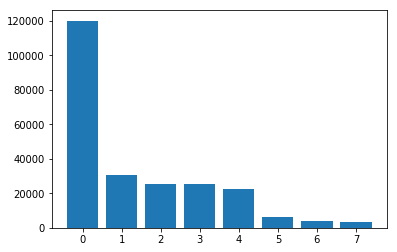

trump                    119998
clinton,trump             30521
                          25429
sanders                   25351
clinton                   22746
clinton,sanders            6044
clinton,trump,sanders      4219
trump,sanders              3172
Name: candidate, dtype: int64


In [7]:
counts = tweets["candidate"].value_counts()
plt.bar(range(len(counts)), counts)
plt.show()

print(counts)

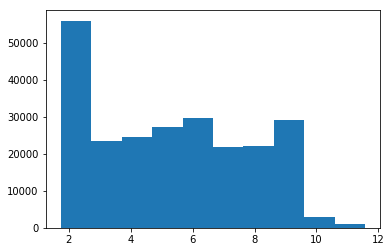

In [8]:
from datetime import datetime

tweets["created"] = pd.to_datetime(tweets["created"])
tweets["user_created"] = pd.to_datetime(tweets["user_created"])

tweets["user_age"] = tweets["user_created"].apply(lambda x: (datetime.now() - x).total_seconds() / 3600 / 24 / 365)
plt.hist(tweets["user_age"])
plt.show()

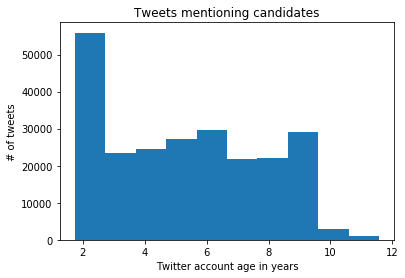

In [9]:
plt.hist(tweets["user_age"])
plt.title("Tweets mentioning candidates")
plt.xlabel("Twitter account age in years")
plt.ylabel("# of tweets")
plt.show()

/Users/peter_zhang/anaconda2/lib/python2.7/site-packages/numpy/core/fromnumeric.py:57: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  return getattr(obj, method)(*args, **kwds)


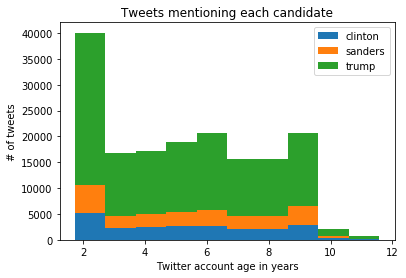

In [10]:
cl_tweets = tweets["user_age"][tweets["candidate"] == "clinton"]
sa_tweets = tweets["user_age"][tweets["candidate"] == "sanders"]
tr_tweets = tweets["user_age"][tweets["candidate"] == "trump"]
plt.hist([
        cl_tweets, 
        sa_tweets, 
        tr_tweets
    ], 
    stacked=True, 
    label=["clinton", "sanders", "trump"]
)
plt.legend()
plt.title("Tweets mentioning each candidate")
plt.xlabel("Twitter account age in years")
plt.ylabel("# of tweets")
plt.show()

In [4]:
plt.hist([
        cl_tweets, 
        sa_tweets, 
        tr_tweets
    ], 
    stacked=True, 
    label=["clinton", "sanders", "trump"]
)
plt.legend()
plt.title("Tweets mentioning each candidate")
plt.xlabel("Twitter account age in years")
plt.ylabel("# of tweets")
plt.annotate('More Trump tweets', xy=(1, 35000), xytext=(2, 35000),
            arrowprops=dict(facecolor='black'))
plt.show()

NameError: name 'cl_tweets' is not defined

In [30]:
import matplotlib.colors as colors

tweets["red"] = tweets["user_bg_color"].apply(lambda x: colors.hex2color('#{0}'.format(x))[0])
tweets["blue"] = tweets["user_bg_color"].apply(lambda x: colors.hex2color('#{0}'.format(x))[2])

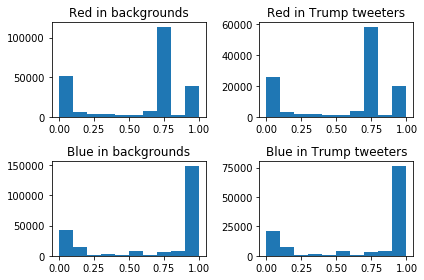

In [31]:
fig, axes = plt.subplots(nrows=2, ncols=2)
ax0, ax1, ax2, ax3 = axes.flat

ax0.hist(tweets["red"])
ax0.set_title('Red in backgrounds')

ax1.hist(tweets["red"][tweets["candidate"] == "trump"].values)
ax1.set_title('Red in Trump tweeters')

ax2.hist(tweets["blue"])
ax2.set_title('Blue in backgrounds')

ax3.hist(tweets["blue"][tweets["candidate"] == "trump"].values)
ax3.set_title('Blue in Trump tweeters')

plt.tight_layout()
plt.show()

In [32]:
tweets["user_bg_color"].value_counts()

C0DEED    108977
000000     31119
F5F8FA     25597
131516      7731
1A1B1F      5059
022330      4300
0099B9      3958
642D8B      3767
FFFFFF      3101
9AE4E8      2651
ACDED6      2383
352726      2338
C6E2EE      1978
709397      1518
EBEBEB      1475
FF6699      1370
BADFCD      1336
FFF04D      1300
EDECE9      1225
B2DFDA      1218
DBE9ED      1113
ABB8C2      1101
8B542B      1073
3B94D9       623
89C9FA       414
DD2E44       351
94D487       318
4A913C       300
9266CC       287
F5ABB5       267
           ...  
5470A8         1
00AEFF         1
C49C4B         1
778877         1
09380E         1
09536E         1
3D3C3D         1
48394D         1
3D3C3A         1
140C0E         1
AE1BCF         1
EBE39B         1
056785         1
FCF3EA         1
2E332F         1
FCF7F8         1
FCF7F7         1
0F6B2C         1
1D1F1B         1
180018         1
2686B3         1
8F0E8F         1
CCD4E8         1
FFEF42         1
08F5F5         1
4E5254         1
42373E         1
272D29        

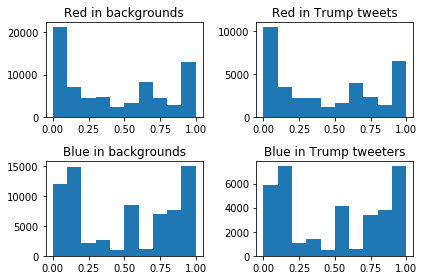

In [33]:
tc = tweets[~tweets["user_bg_color"].isin(["C0DEED", "000000", "F5F8FA"])]

def create_plot(data):
    fig, axes = plt.subplots(nrows=2, ncols=2)
    ax0, ax1, ax2, ax3 = axes.flat

    ax0.hist(data["red"])
    ax0.set_title('Red in backgrounds')

    ax1.hist(data["red"][data["candidate"] == "trump"].values)
    ax1.set_title('Red in Trump tweets')

    ax2.hist(data["blue"])
    ax2.set_title('Blue in backgrounds')

    ax3.hist(data["blue"][data["candidate"] == "trump"].values)
    ax3.set_title('Blue in Trump tweeters')

    plt.tight_layout()
    plt.show()

create_plot(tc)

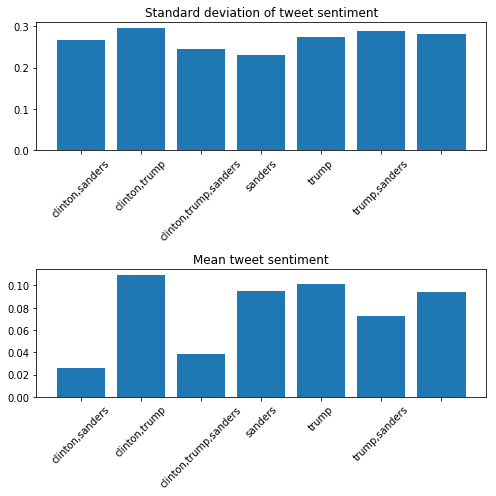

In [34]:
gr = tweets.groupby("candidate").agg([np.mean, np.std])

fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(7, 7))
ax0, ax1 = axes.flat

std = gr["polarity"]["std"].iloc[1:]
mean = gr["polarity"]["mean"].iloc[1:]
ax0.bar(range(len(std)), std)
ax0.set_xticklabels(std.index, rotation=45)
ax0.set_title('Standard deviation of tweet sentiment')

ax1.bar(range(len(mean)), mean)
ax1.set_xticklabels(mean.index, rotation=45)
ax1.set_title('Mean tweet sentiment')

plt.tight_layout()
plt.show()

In [38]:
def tweet_lengths(text):
    if len(text) < 100:
        return "short"
    elif 100 <= len(text) <= 135:
        return "medium"
    else:
        return "long"

tweets["tweet_length"] = tweets["text"].apply(tweet_lengths)

tl = {}
for candidate in ["clinton", "sanders", "trump"]:
    tl[candidate] = tweets["tweet_length"][tweets["candidate"] == candidate].value_counts()

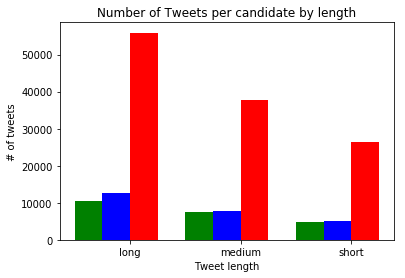

In [39]:
fig, ax = plt.subplots()
width = .5
x = np.array(range(0, 6, 2))
ax.bar(x, tl["clinton"], width, color='g')
ax.bar(x + width, tl["sanders"], width, color='b')
ax.bar(x + (width * 2), tl["trump"], width, color='r')

ax.set_ylabel('# of tweets')
ax.set_title('Number of Tweets per candidate by length')
ax.set_xticks(x + (width * 1.5))
ax.set_xticklabels(('long', 'medium', 'short'))
ax.set_xlabel('Tweet length')
plt.show()

Aggregate the results by state.

In [14]:
'''
Adding to the filters for each state will increaes the number of captures
'''

filters = [
    ['al', 'alabama'],
    ['ak', 'alska'],
    ['az', 'arizona'],
    ['ar', 'arkansas'],
    ['ca', 'cali', 'california'],
    ['co', 'colorado'],
    ['ny'],
    ['pa', 'pittsburgh'],
    ['tx', 'texas', 'austin', 'houstin'],
    ['va', 'virginia'],
    ['wv'],
    ['wy']]

def get_state(row):
    result = []    
    location = str(row).lower().split(' ')
    
    found = False
    for word in location:
        found = False
        for f in filters:
            for addr in f:
                if addr == word:
                    found = True
                    result.append(f[0])
                    break
            if found:
                break
        if found:
            break        
    
    if found == False:
        result.append('N/A')
    
    return ",".join(result)

tweets["state"] = tweets['user_location'].apply(get_state)

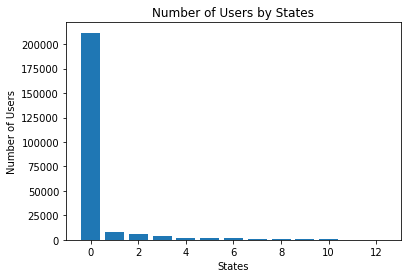

N/A    211669
ca       8394
tx       6164
ny       3632
pa       1644
az       1562
va       1523
co       1323
al        809
ar        359
wv        310
ak         74
wy         17
Name: state, dtype: int64


In [15]:
counts = tweets['state'].value_counts()
plt.bar(range(len(counts)), counts)
plt.title("Number of Users by States")
plt.xlabel("States")
plt.ylabel("Number of Users")
plt.show()

print (counts)

## Written Questions
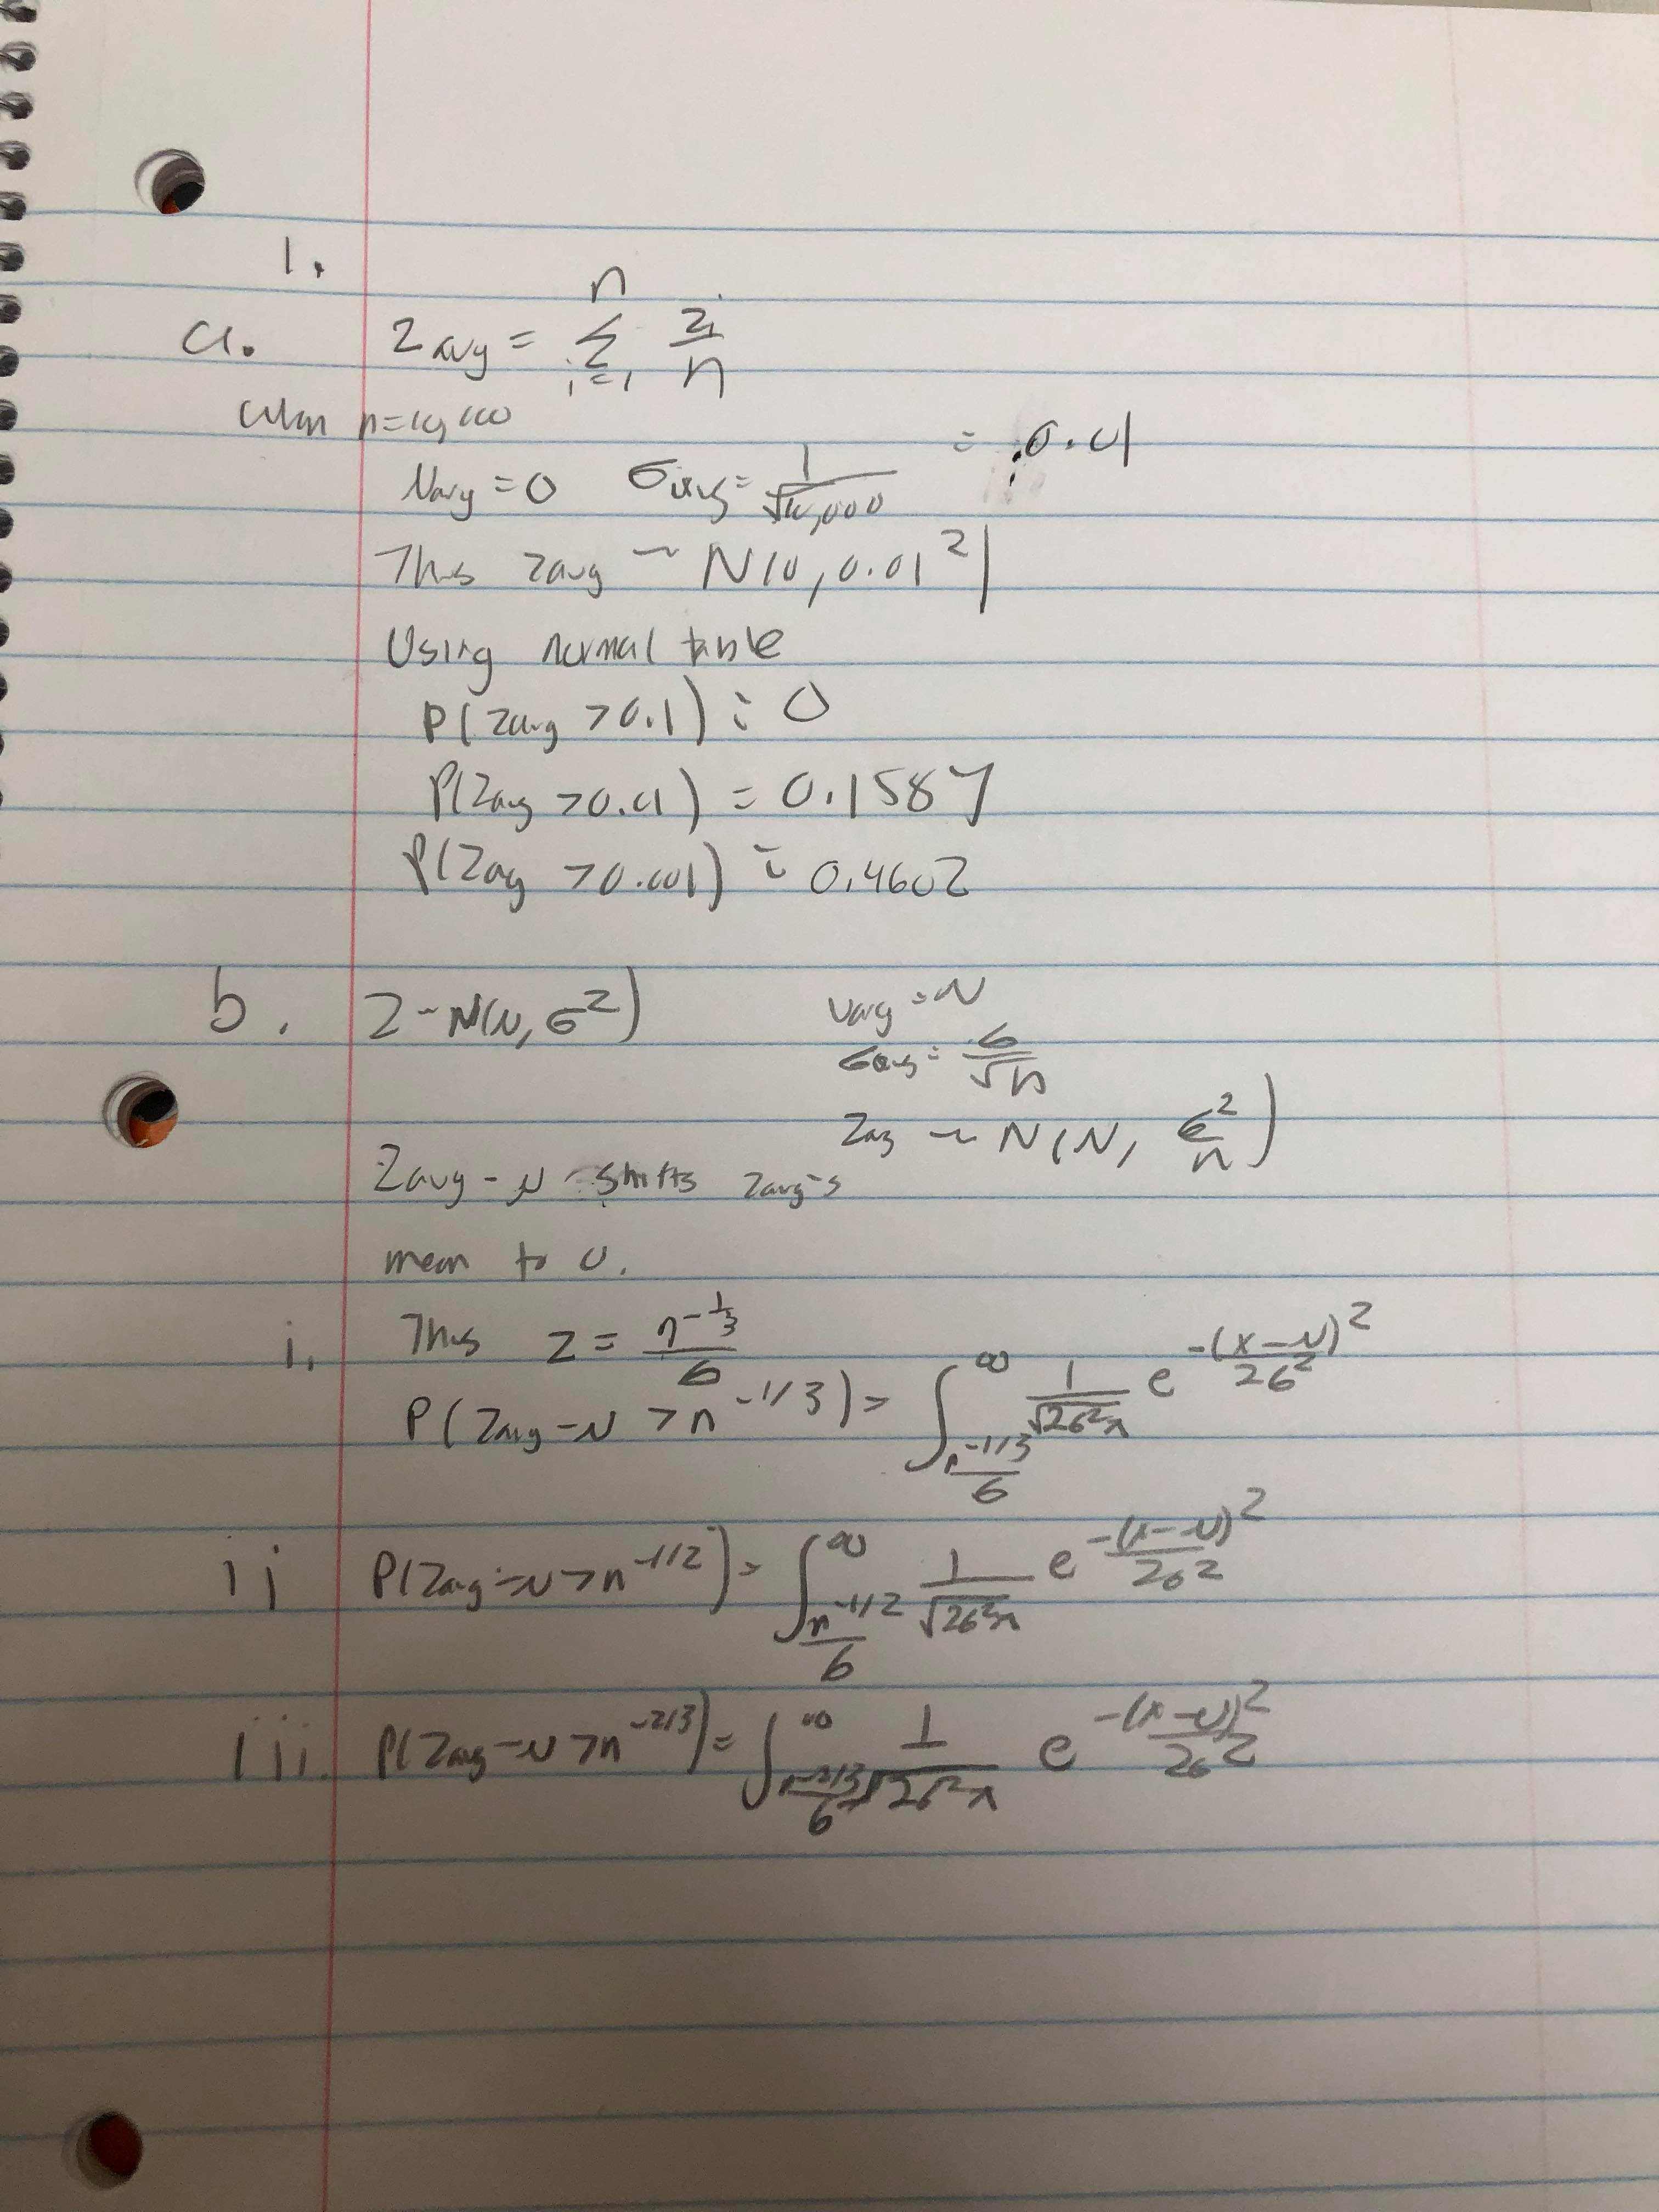
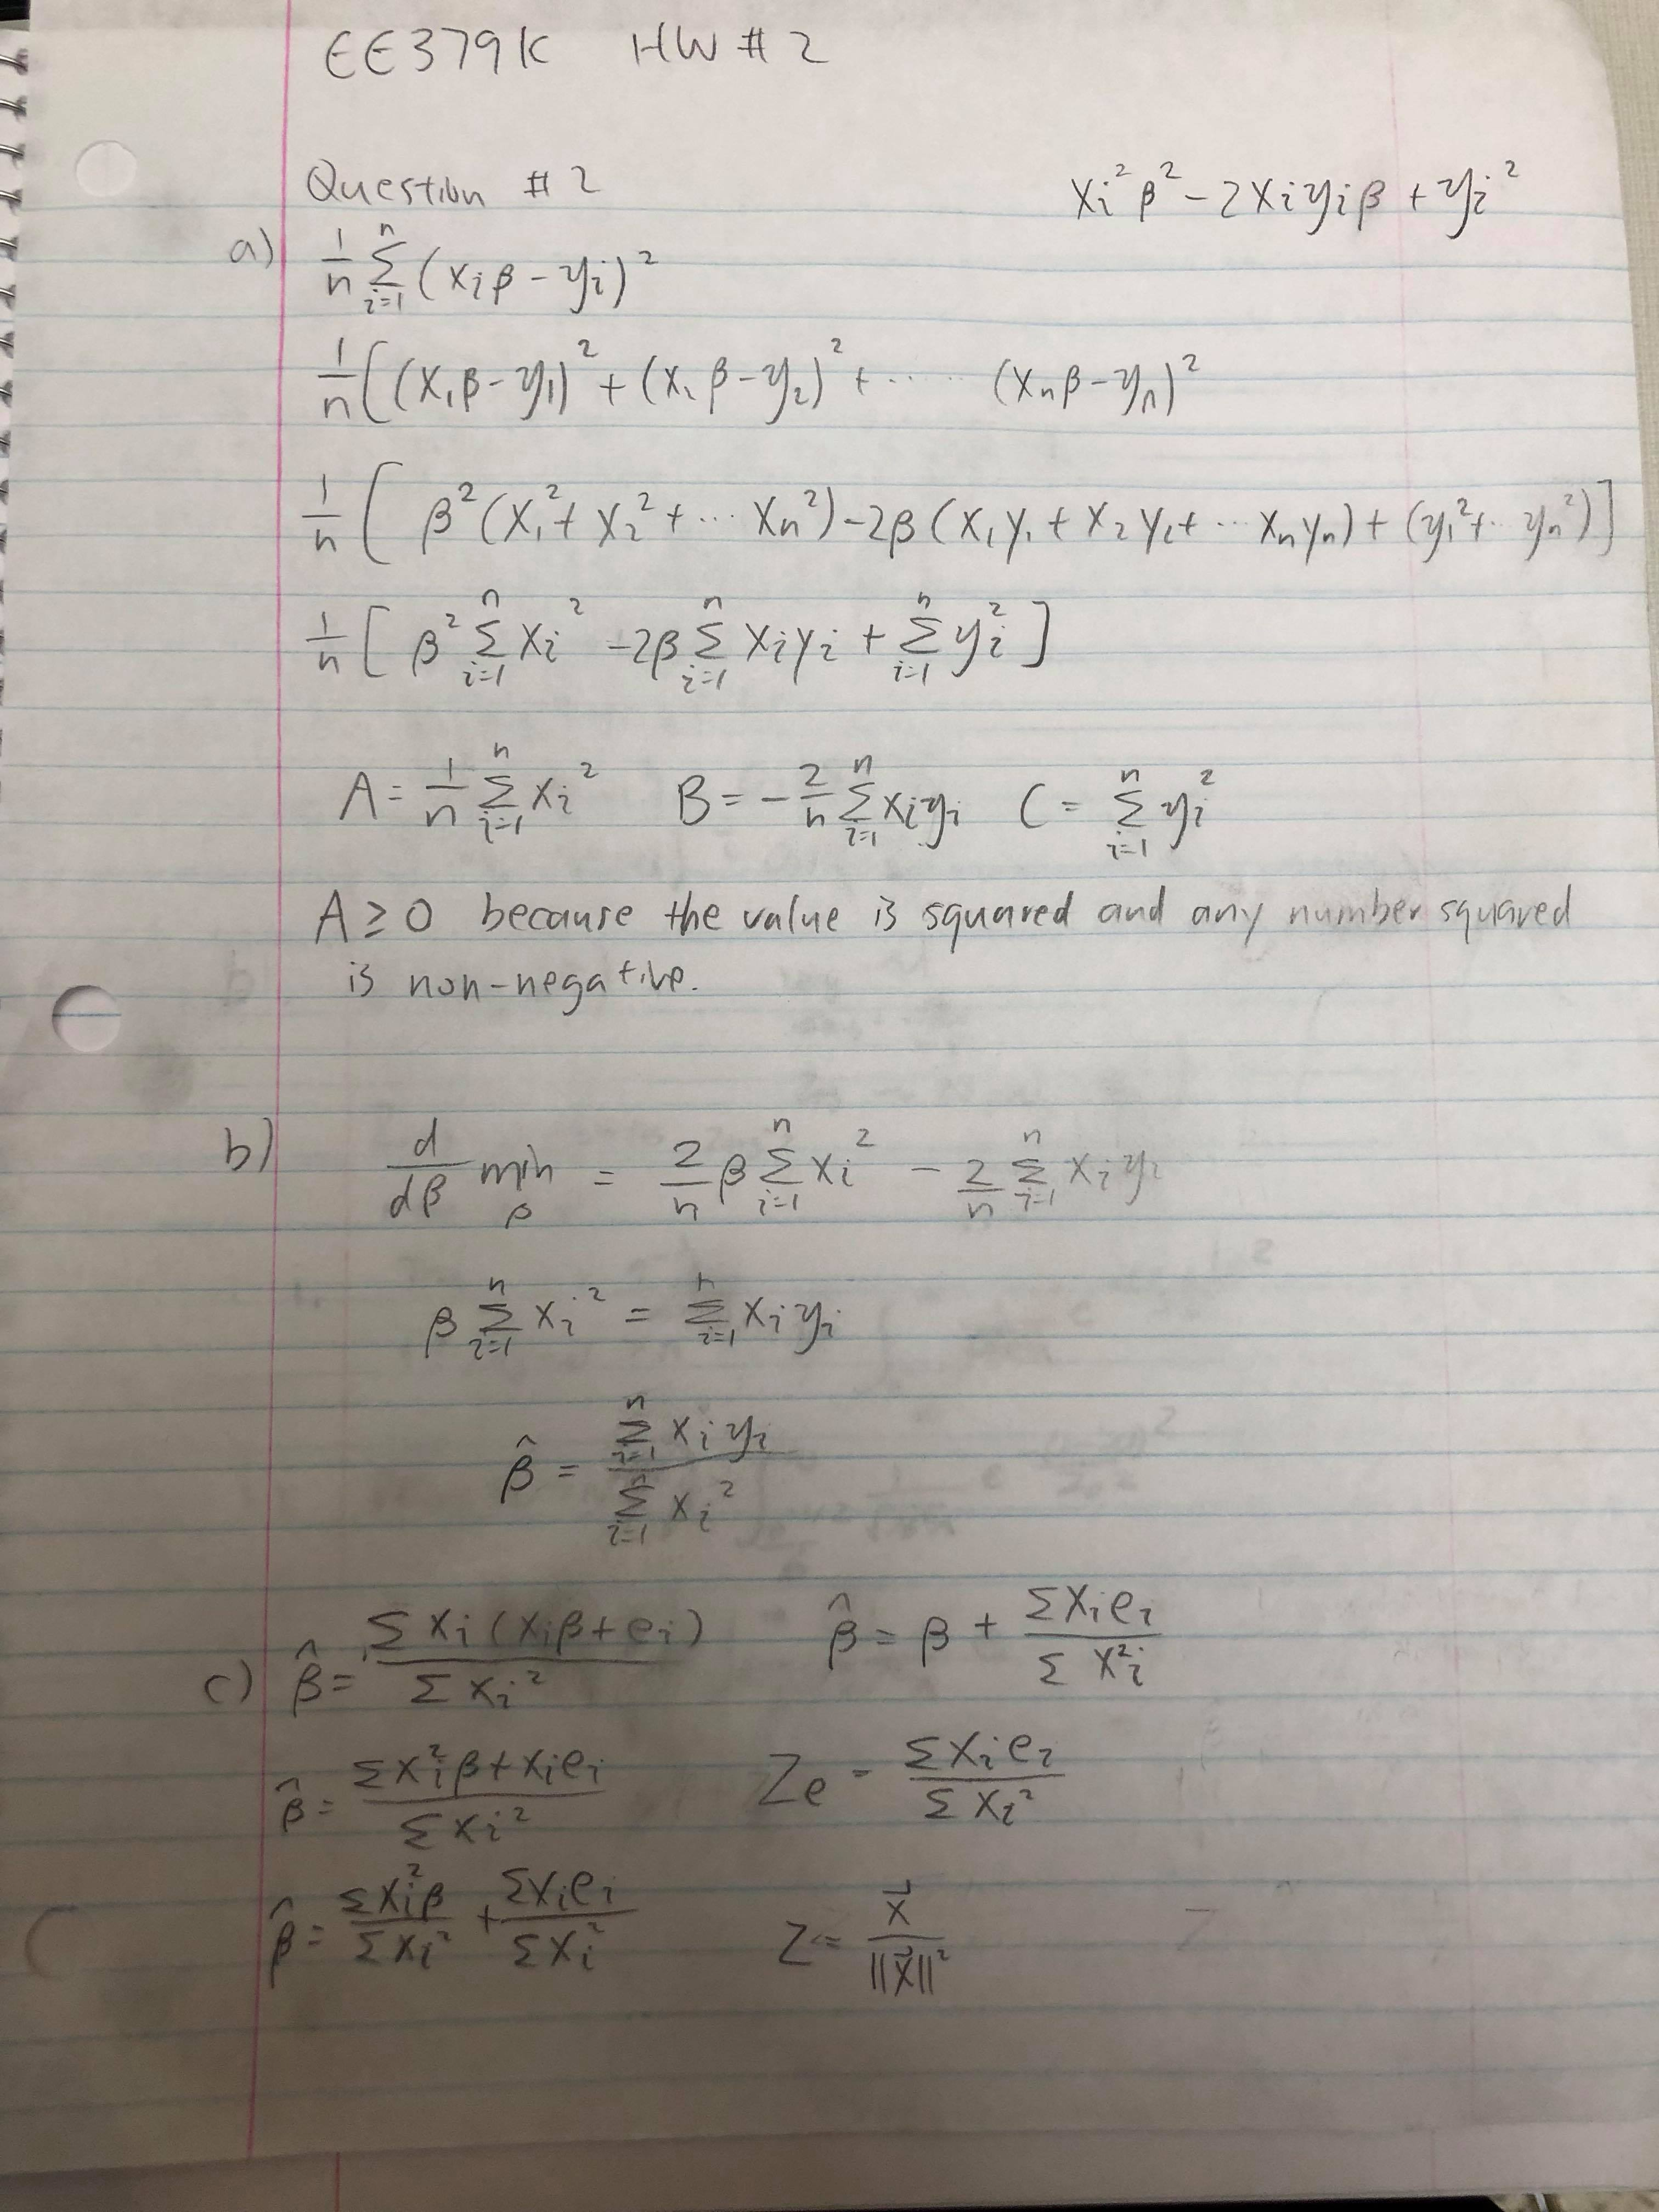